In [7]:
import pandas as pd
import numpy as np
!git clone https://github.com/propublica/compas-analysis/

fatal: destination path 'compas-analysis' already exists and is not an empty directory.


In [ ]:
import seaborn as sns

Import necessary datasets

In [3]:
two_years_v = pd.read_csv('./compas-analysis/compas-scores-two-years-violent.csv')
two_years = pd.read_csv('./compas-analysis/compas-scores-two-years.csv')
compas = pd.read_csv('./compas-analysis/compas-scores.csv')
compas_simple = compas[['id', 'name', 'sex', 'dob', 'priors_count', 'race', 'decile_score', 'is_recid']].set_index('id')
#add age column instead of dob

# Introduction

##### Northpointe, a for-profit company, decides to create a model that will generate 'risk scores' for criminals. These risk scores represent how likely, according to their algorithm, a defendant will reoffend.

## Question 1 (Conceptual)

##### Have students answer set-up questions - why would this be useful? Who would this be used by? What kind of information may be harmful to use in this algorithm? (Modify information in introduction to match)

Suppose you have the below dataset of defendants, which includes the columns:

In [6]:
compas_simple.head(5)

,name,sex,dob,priors_count,race,decile_score,is_recid
id,,,,,,,
1,miguel hernandez,Male,1947-04-18,0,Other,1,0
2,michael ryan,Male,1985-02-06,0,Caucasian,5,-1
3,kevon dixon,Male,1982-01-22,0,African-American,3,1
4,ed philo,Male,1991-05-14,4,African-American,4,1
5,marcu brown,Male,1993-01-21,1,African-American,8,0


Question 1 (code) - find out simple statistics/visualizations from the dataset; what did the Compas algorithm predict for each age/sex demographic?
 - histogram for age and sex

<Axes: xlabel='decile_score', ylabel='Count'>

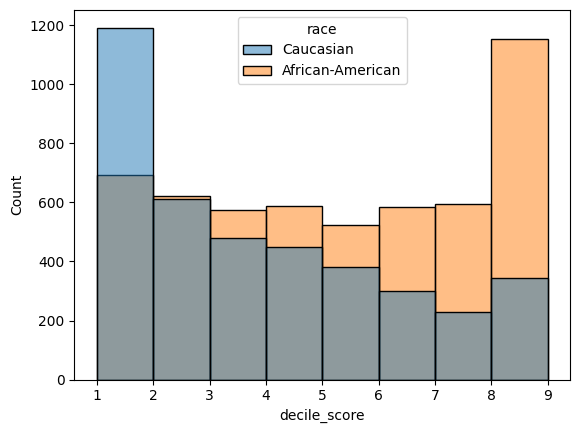

In [23]:
filtered_race = compas_simple[(compas_simple.race == 'African-American') | (compas_simple.race == 'Caucasian')]
sns.histplot(data=filtered_race, x = 'decile_score', hue='race', bins=range(1, 10, 1))

<Axes: xlabel='decile_score', ylabel='Count'>

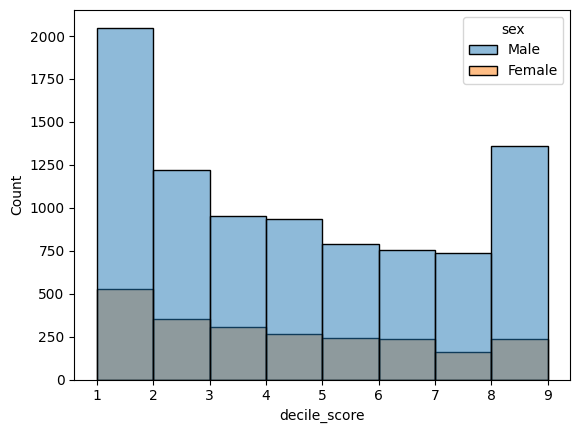

In [26]:
sns.histplot(data=compas_simple, x = 'decile_score', hue='sex', bins=range(1, 10, 1))

<Axes: xlabel='decile_score', ylabel='priors_count'>

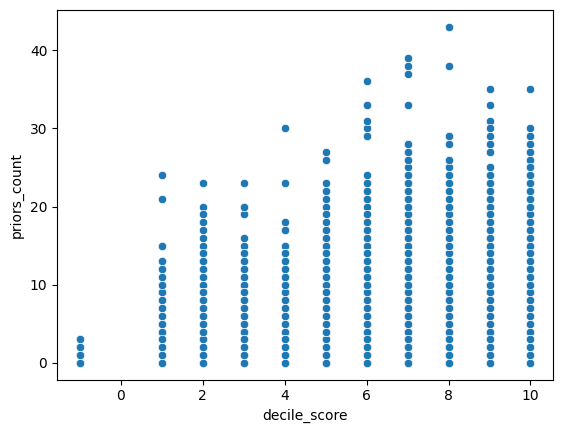

In [28]:
sns.scatterplot(data=compas_simple, x = 'decile_score', y='priors_count')

# Question 2
##### Have students work with the is_recid column (is this blind analysis?)- how does this change our analyses? What would our assumptions without knowing this column be?

##### Have students code false positive/false negative rates - how do we balance these in this model? Think about implications of each for different groups. Which one should we prioritize?

##### What does an accurate model mean?

# Question 3

##### Statistical and systemic bias